<div style="padding-top: 12px;">
    <center>
        <span style="font-size: 50px; font-family: Montserrat; font-weight: 700;">Prediksi Penyakit Jantung</span>
        <br>
        <span style="font-size: 25px; font-family: Montserrat; font-weight: 200; text-align: center;">menggunakan <span style="font-weight: 600;">Algoritma <i>Machine Learning</i></span></span>
    </center>
</div>
<hr>

<hr>
<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-size: 14px; font-weight: 400;">Selamat datang di notebook saya! Silakan luangkan waktu anda untuk membaca notebook saya! Jika anda memiliki <b><mark>saran apapun</mark></b> untuk saya, tolong <b><mark>beri tahu saya</mark></b> di kolom komentar. Dan jika anda <b><mark>menyukai pekerjaan saya</mark></b>, tolong <b><mark>beri saya upvote dan like</mark></b>. Terima kasih!</div>
</center>
<hr>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Pendahuluan </div>
<center>
    <img src="https://images.unsplash.com/photo-1623134915837-d2fdb4f59035?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8aGVhcnQlMjBmYWlsdXJlfGVufDB8fDB8fHww" alt="Jantung" width="60%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo by Ali Hajiluyi from Unsplash</i></span>
</center>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.1 | Tentang Dataset </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 di dunia, dengan estimasi 17,9 juta jiwa tiap tahun, yang tercatat sebesar 31% dari seluruh kematian di dunia. Empat dari lima kematian akibat CVD disebabkan oleh serangan jantung dan stroke, dan satu - tiga dari kematian tersebut terjadi secara cepat pada orang di bawah usia 70 tahun. Gagal jantung merupakan kejadian umum yang disebabkan oleh CVD dan dataset ini mengandung 11 fitur yang dapat digunakan untuk memprediksi kemungkinan terkena penyakit jantung.
    <br>
    Orang dengan penyakit kardiovaskular atau orang dengan risiko kardiovaskular tinggi (disebabkan oleh adanya satu atau lebih faktor seperti hipertensi, diabetes, hiperlipidemia, atau telah memiliki penyakit) membutuhkan deteksi dini dan penanganan dimana sebuah model pemelajaran mesin dapat menjadi bantuan yang baik.
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.2 | Tujuan </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Proyek ini bertujuan untuk:
    <ol>
        <li>Memahami dataset melalui eksplorasi data dan visualisasi data.</li>
        <li>Membangun beberapa model <i>machine learning</i> untuk melakukan prediksi.</li>
        <li>Menerapkan model tuning untuk mendapatkan skor akurasi yang lebih baik.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.3 | Model Machine Learning </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Model yang digunakan dalam proyek ini:
    <ol>
        <li>Logistic Regression,</li>
        <li>Support Vector Classification,</li>
        <li>Decision Tree Classifier,</li>
        <li>AdaBoost Classifier,</li>
        <li>K-Nearest Neighbors Classifier.</li>
    </ol>
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Mengimpor Library </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Memuat Dataset </div>

In [2]:
df = pd.read_csv('heart.csv')
df.head().style.background_gradient(cmap='OrRd').hide()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [3]:
# -- Dataset Information --
print('Total Rows\t:', df.shape[0])
print('Total Columns\t:', df.shape[1])

Total Rows	: 918
Total Columns	: 12


In [4]:
# -- Dataset Summary --
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)

In [5]:
# -- Null Values --
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
# -- Duplicated Data --
print(df.duplicated().sum())

0


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4 | Eksplorasi Data </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.1 | Data Kategorikal </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Kolom data yang termasuk ke dalam data kategorikal antara lain:
    <ol>
        <li>Sex</li>
        <li>ChestPainType</li>
        <li>FastingBS</li>
        <li>RestingECG</li>
        <li>ExerciseAngina</li>
        <li>ST_Slope</li>
    </ol>
</div>

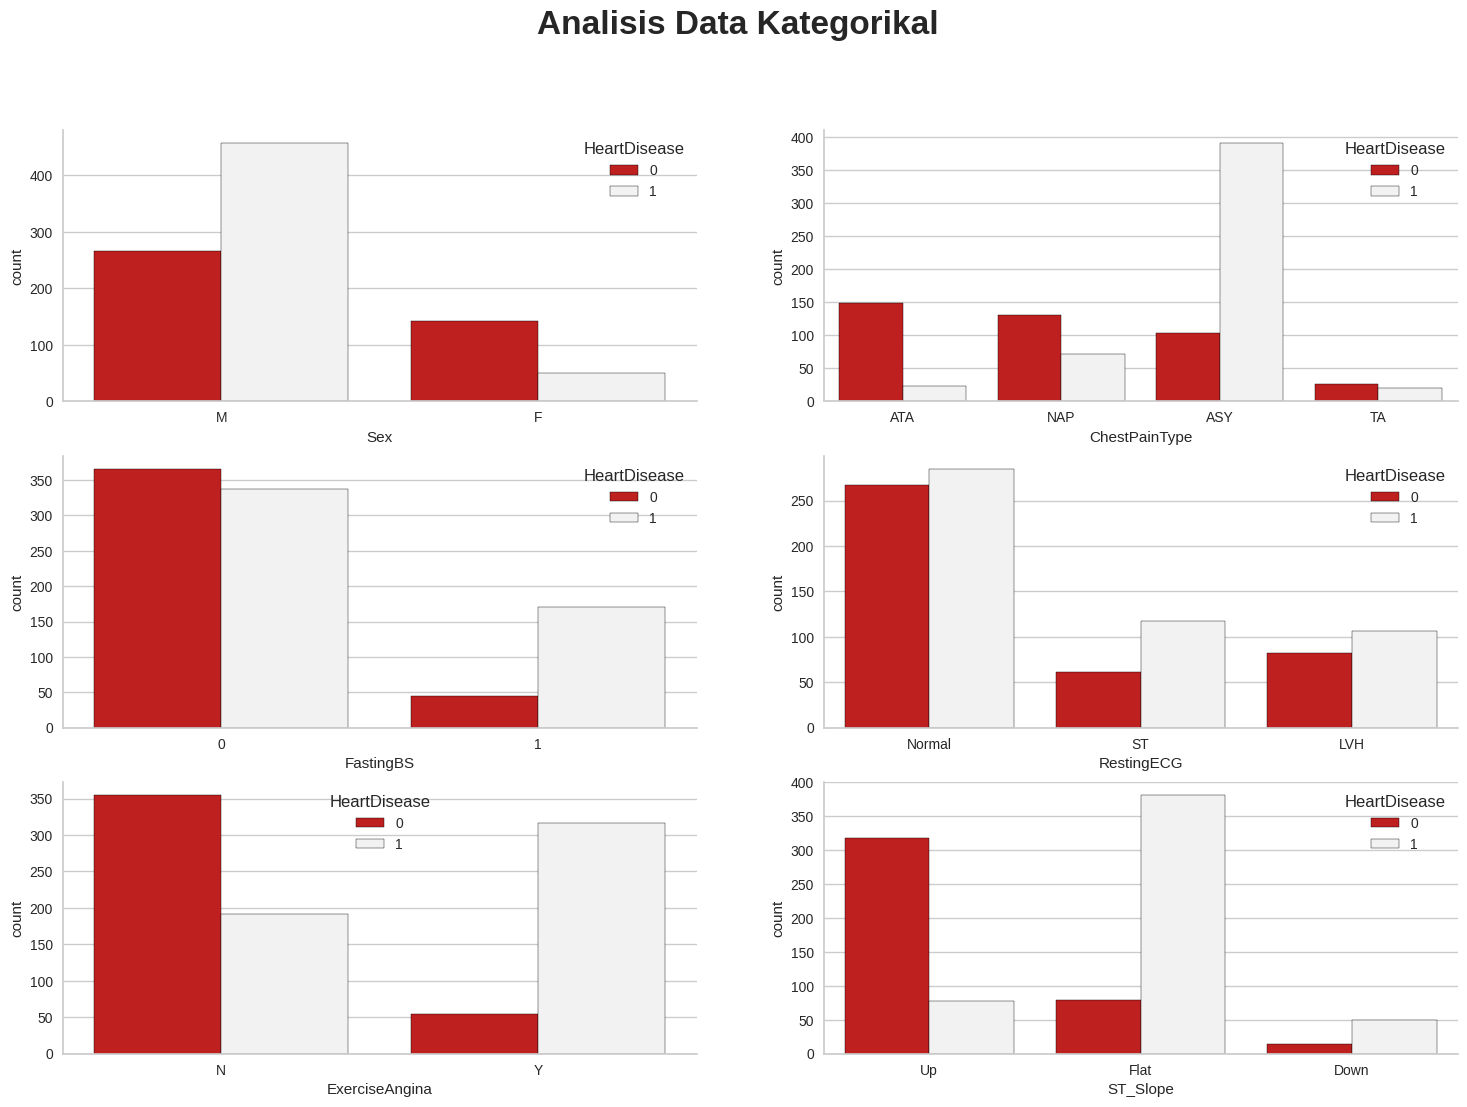

In [7]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Kategorikal", fontweight='heavy', fontsize='24')

# -- Bar Chart --
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax_sex, palette=colors, edgecolor='#000000')
sns.despine()

ax_chestpaintype = fig.add_subplot(gs[0,1])
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=ax_chestpaintype, palette=colors, edgecolor='#000000')
sns.despine()

ax_fastingbs = fig.add_subplot(gs[1,0])
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, ax=ax_fastingbs, palette=colors, edgecolor='#000000')
sns.despine()

ax_restingecg = fig.add_subplot(gs[1,1])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=ax_restingecg, palette=colors, edgecolor='#000000')
sns.despine()

ax_exerciseangina = fig.add_subplot(gs[2,0])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=ax_exerciseangina, palette=colors, edgecolor='#000000')
sns.despine()

ax_stslope = fig.add_subplot(gs[2,1])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=ax_stslope, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Kesimpulan</b>:
    <ol>
        <li>Pada grafik pertama, dapat dilihat bahwa sebagian besar penderita penyakit jantung adalah laki-laki.</li>
        <li>Pada grafik kedua, dapat dilihat bahwa sebagian pasien tidak mengalami gejala nyeri apapun pada dadanya.</li>
        <li>Pada grafik ketiga, dapat dilihat bahwa sebagian besar pasien yang menderita penyakit jantung memiliki gula darah puasa yang normal.</li>
        <li>Pada grafik keempat, dapat dilihat bahwa sebagian besar pasien memiliki hasil resting EKG normal.</li>
        <li>Pada grafik kelima, dapat dilihat bahwa sebagian besar pasien melakukan terapi angina.</li>
        <li>Pada grafik keenam, dapat dilihat bahwa pasien dengan melakukan sesi terapi depresi dengan frekuensi yang konstan cenderung menderita penyakit jantung.</li>
    </ol>
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.2 | Data Numerikal </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Kolom data yang termasuk ke dalam data numerikal antara lain:
    <ol>
        <li>Age</li>
        <li>Cholesterol</li>
        <li>FastingBS</li>
        <li>MaxHR</li>
        <li>Oldpeak</li>
    </ol>
</div>

<ipython-input-8-558f9caffd5f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
<ipython-input-8-558f9caffd5f>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
<ipython-input-8-558f9caffd5f>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
<ipython-input-8-558f

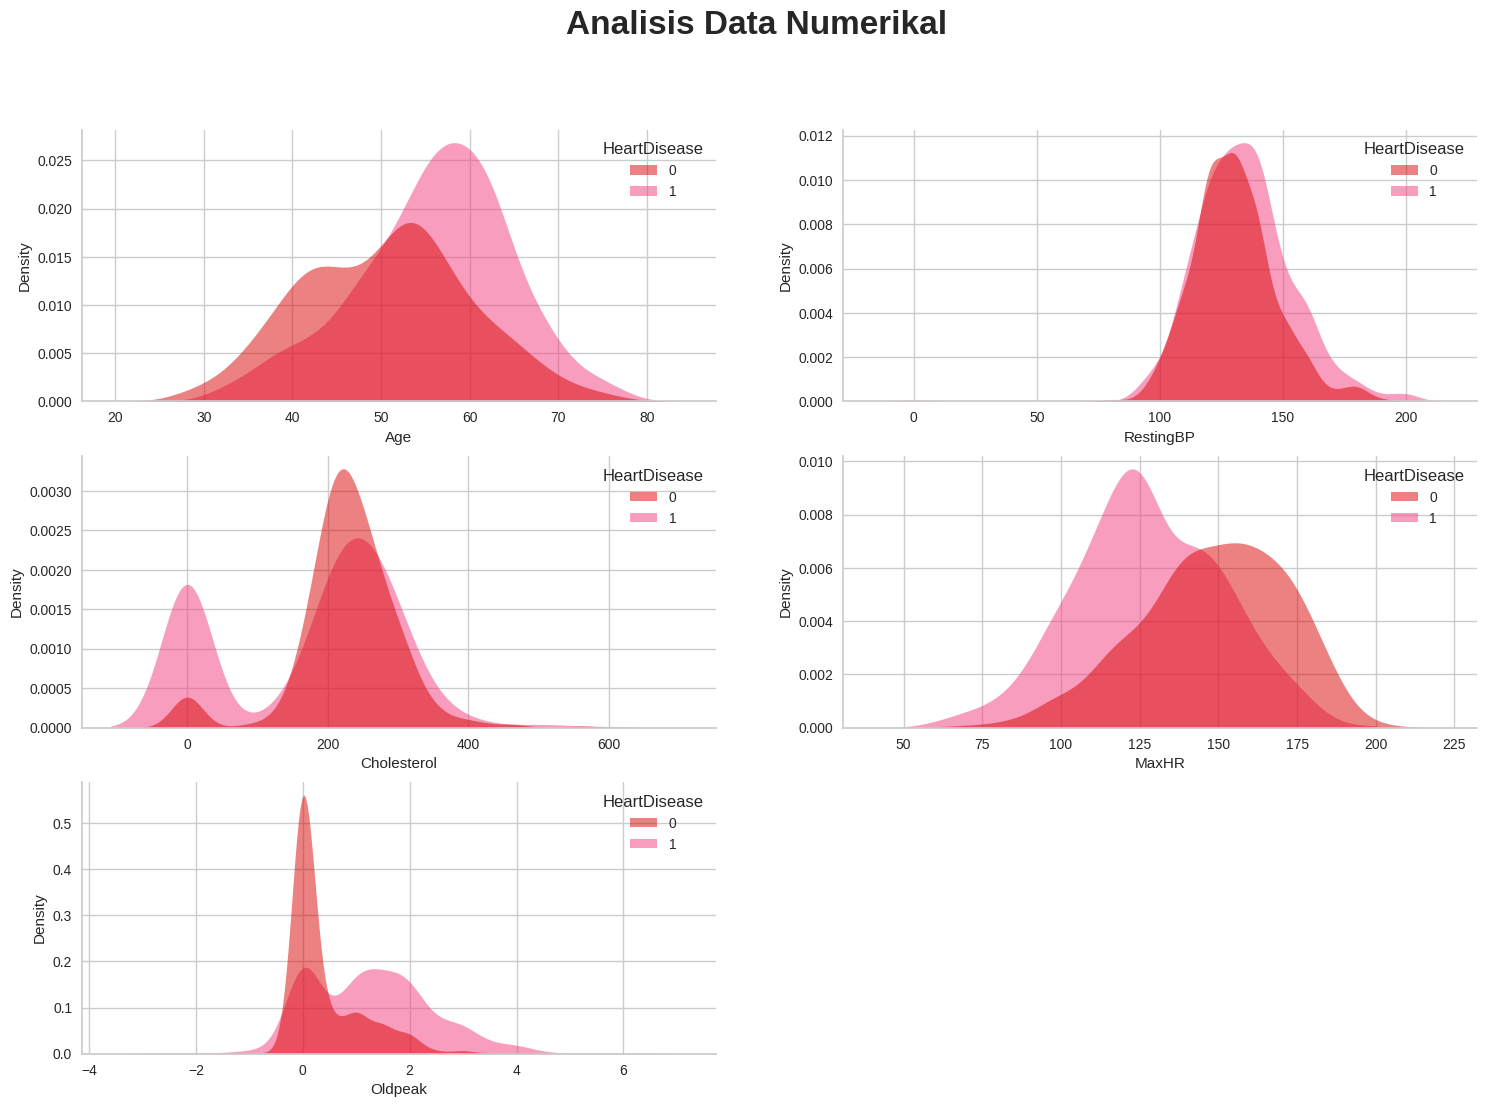

In [8]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F23D7F']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Numerikal", fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax_age = fig.add_subplot(gs[0,0])
sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
sns.despine()

ax_restingbp = fig.add_subplot(gs[0,1])
sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
sns.despine()

ax_cholesterol = fig.add_subplot(gs[1,0])
sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
sns.despine()

ax_maxhr = fig.add_subplot(gs[1,1])
sns.kdeplot(x='MaxHR', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_maxhr, palette=colors, shade=True)
sns.despine()

ax_oldpeak = fig.add_subplot(gs[2,0])
sns.kdeplot(x='Oldpeak', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_oldpeak, palette=colors, shade=True)
sns.despine()

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Kesimpulan</b>:
    <ol>
        <li>Sebagian besar pasien yang menderita penyakit jantung berkisar sekitar 50-65 tahun.</li>
        <li>Sebagian besar penderita penyakit jantung dan bukan penderita penyakit jantung memiliki tekanan darah di atas normal (120 mmHg).</li>
        <li>Sebagian besar penderita penyakit jantung dan bukan penderita penyakit janrung memiliki kadar kolesterol yang tinggi dan di atas normal (200 mm/dL).</li>
        <li>Orang yang tidak menderita penyakit jantung cenderung memiliki detak jantung maksimal lebih tinggi dibanding orang dengan penyakit jantung.</li>
        <li>Orang yang tidak menderita penyakit jantung cenderung memiliki nilai oldpeak 0 dibanding orang yang menderita penyakit jantung yang memiliki persebaran yang lebih merata.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.3 | Data Target </div>

<ipython-input-9-e5eb2c2b203e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')


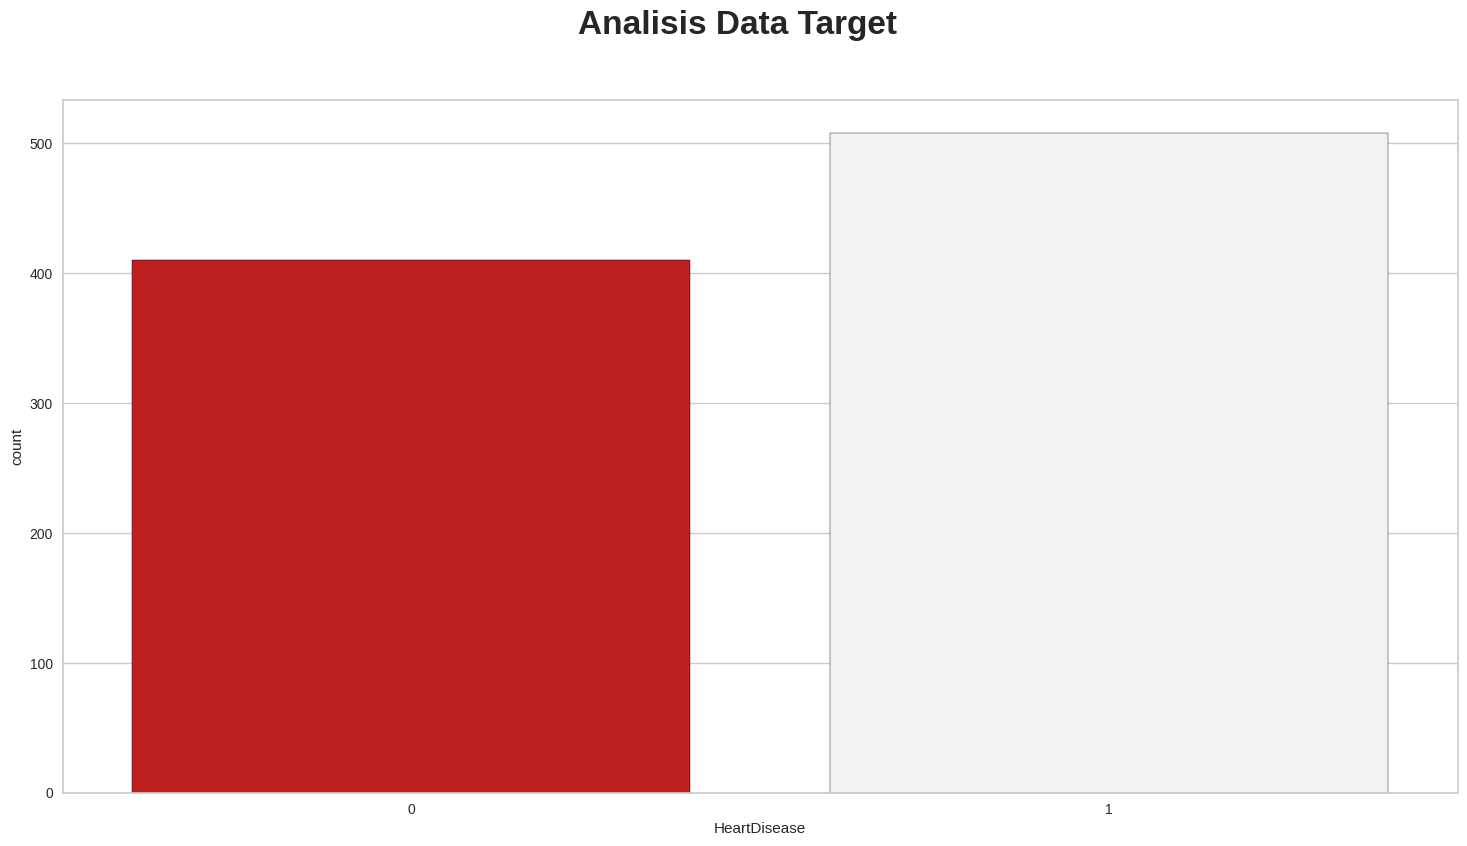

In [9]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
plt.figure(figsize=(18,9))
plt.suptitle("Analisis Data Target", fontweight='heavy', fontsize='24')

# -- Bar Chart --
sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')

plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Kesimpulan</b>:
    <ol>
        <li>Dataset ini diisi dengan lebih banyak data orang dengan penyakit jantung.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.4 | Analisis Korelasi </div>

<ipython-input-10-3a368f69d0f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='OrRd')


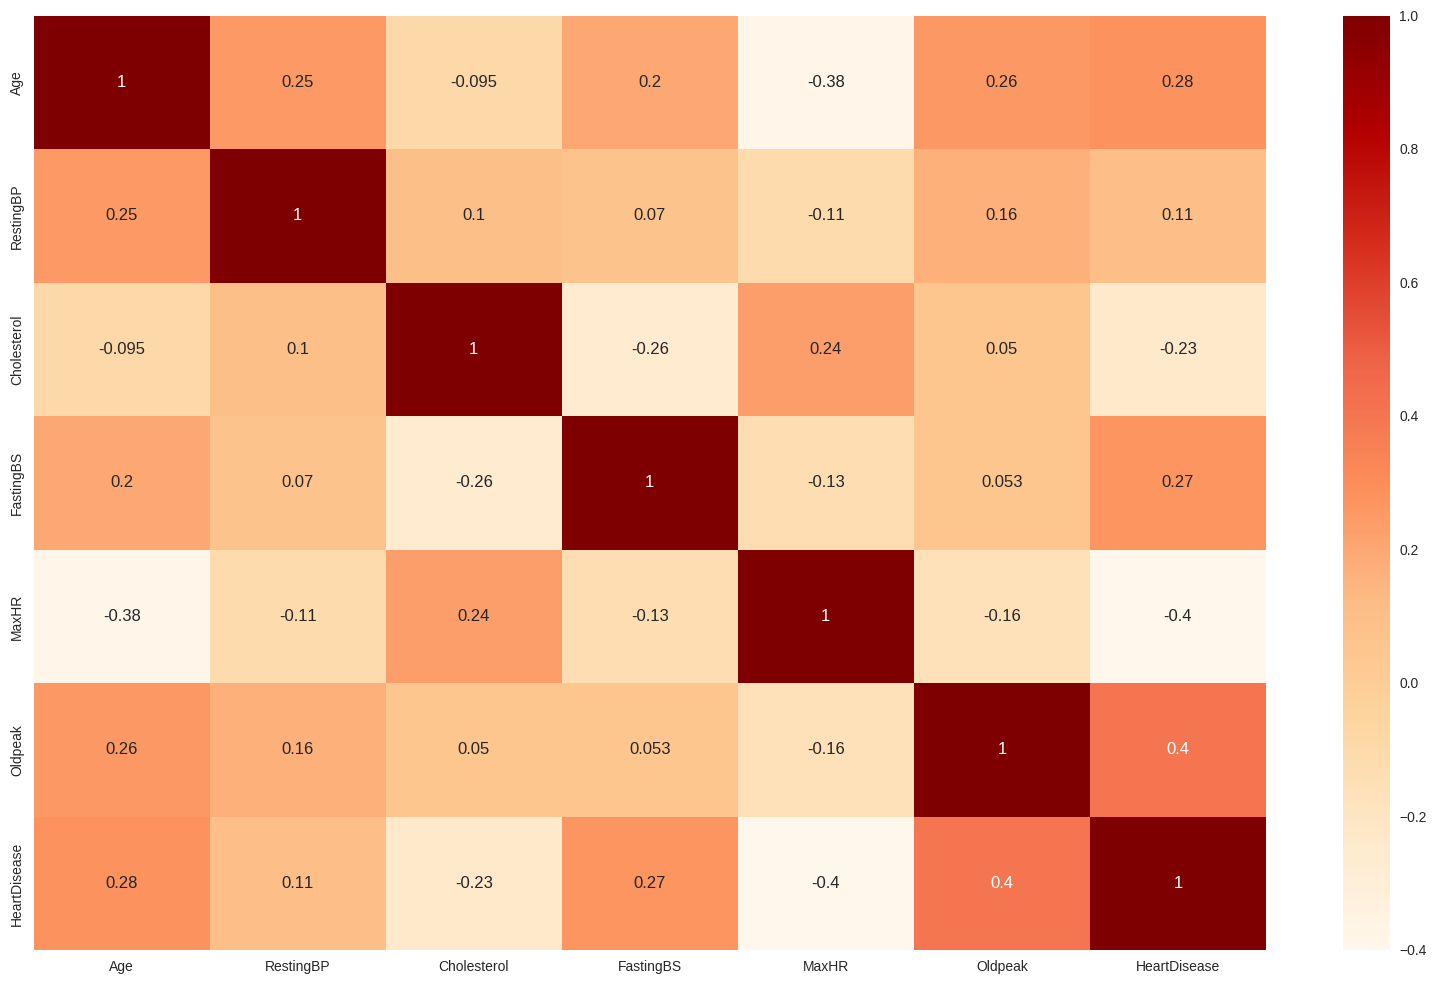

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')
plt.tight_layout()
plt.show()

<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Kesimpulan</b>:
    <ol>
        <li>Oldpeak memiliki korelasi yang cukup dengan HeartDisease.</li>
    </ol>
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5 | Data Pra-Proses </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.1 | One-Hot Encoding </div>

In [11]:
sex = pd.get_dummies(df['Sex'], prefix='Sex', dtype='int64')
chestpaintype = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType', dtype='int64')
restingecg = pd.get_dummies(df['RestingECG'], prefix='RestingECG', dtype='int64')
exerciseangina = pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina', dtype='int64')
stslope = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope', dtype='int64')

frames = [df, sex, chestpaintype, restingecg, exerciseangina, stslope]
enc_df = pd.concat(frames, axis=1)

enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.2 | Menghapus Data yang Tidak Perlu </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Data yang akan dihapus dianggap tidak perlu, karena telah dilakukan one-hot encoding, sehinga data perlu untuk dihapus supaya tidak ada duplikasi.
</div>

In [12]:
enc_df = enc_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,140,289,0,172,0.000000,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,160,180,0,156,1.000000,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,130,283,0,98,0.000000,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,138,214,0,108,1.500000,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,150,195,0,122,0.000000,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.3 | Pemisahan Fitur </div>

In [13]:
x = enc_df.drop(['HeartDisease'], axis=1)
y = enc_df['HeartDisease']

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.4 | Normalisasi Data </div>

In [14]:
x = StandardScaler().fit_transform(x)

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.5 | Pemisahan Data </div>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6 | Implementasi Model </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.1 | Logistic Regression </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Logistic Regression adalah jenis analisis statistik yang sering digunakan untuk permodelan prediktif. Pada pendekatan analisis ini, variabel dependennya bisa berupa biner atau multinomial. Jenis analisis ini dapat membantu dalam memprediksi suatu kemungkinan.
</div>
<center>
    <img src="https://miro.medium.com/max/1400/1*44qV8LhNzE5hPnta2PaaHw.png" alt="logistic regression" width="50%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo from towardsdatascience.com</i></span>
</center>

In [16]:
# -- Model Fit --
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(x_train, y_train)

y_pred_lr = lr_clf.predict(x_test)

In [17]:
# -- Skor Model --
lr_acc = accuracy_score(y_pred_lr, y_test)
print('Akurasi Model Logistic Regression: '+'{:.2f}'.format(lr_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_lr))

Akurasi Model Logistic Regression: 85.33

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



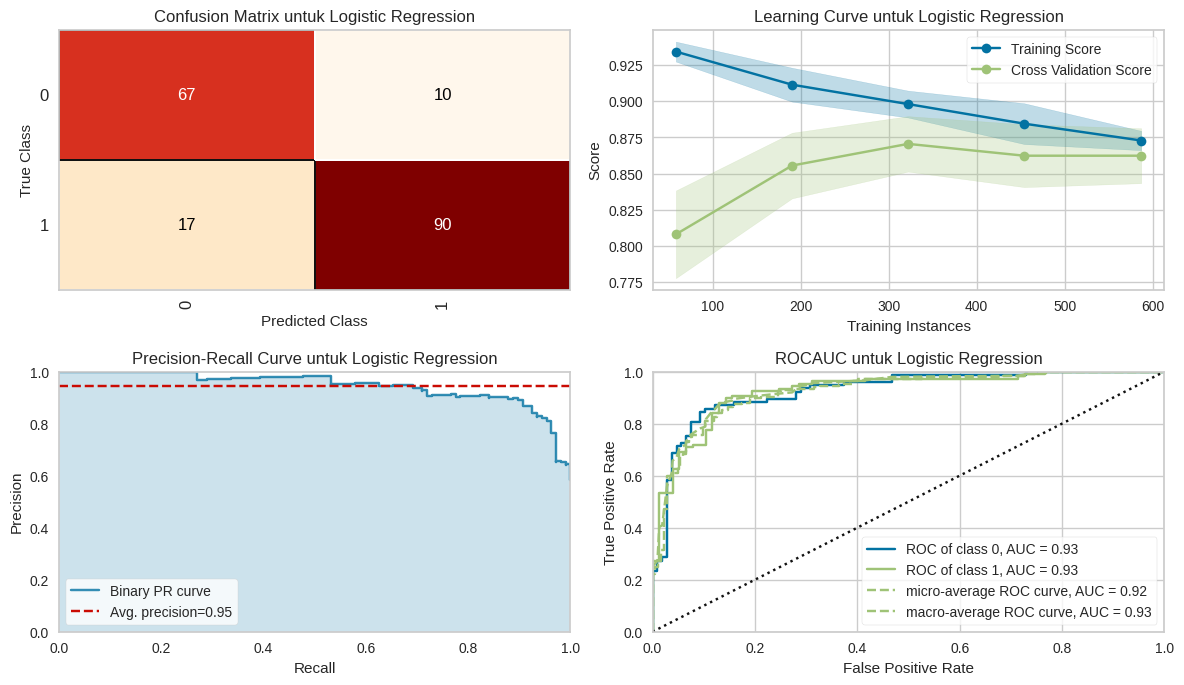

In [18]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
lr_cm = ConfusionMatrix(lr_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk Logistic Regression')
lr_cm.fit(x_train, y_train)
lr_cm.score(x_test, y_test)
lr_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
lr_lc = LearningCurve(lr_clf, ax=ax_lc, title='Learning Curve untuk Logistic Regression')
lr_lc.fit(x_train, y_train)
lr_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
lr_prc = PrecisionRecallCurve(lr_clf, ax=ax_prc, title='Precision-Recall Curve untuk Logistic Regression')
lr_prc.fit(x_train, y_train)
lr_prc.score(x_test, y_test)
lr_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
lr_rocauc = ROCAUC(lr_clf, ax=ax_rocauc, title='ROCAUC untuk Logistic Regression')
lr_rocauc.fit(x_train, y_train)
lr_rocauc.score(x_test, y_test)
lr_rocauc.finalize()

plt.tight_layout()
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.2 | Support Vector Classifier </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Support Vector Machine</i> (SVM) adalah salah satu metode dalam <i>supervised learning</i> yang dapat digunakan untuk klasifikasi ataupun regresi. Salah satu algoritma SVM untuk klasifikasi adalah <i>Support Vector Classification</i> (SVC). Algoritma SVM digunakan untuk mencatri <i>hyperplane</i> terbaik dalam ruang n-dimensi yang secara jelas mengklasifikasikan titik data. <i>Hyperplane</i> adalah sebuah fungsi yang digunakan sebagai pemisah antar kelas yang satu dengan yang lain.
</div>
<center>
    <img src="https://lh4.googleusercontent.com/PDyNZZ1FXbImORO-YSh3miUSz8Ws9cROwv7blNNQXxxxqs-v1lQlyf3tK4xpV0rXWDMiRa9P_Y47FtQbzxm9-EYLQ-CKcUOjYw8WKoe0o70Dva14nWE6ceary6OBWFf0FRvPy8HF" alt="support vector machines" width="50%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo from towardsdatascience.com</i></span>
</center>

In [19]:
# -- Model Fit --
sv_clf = SVC(kernel='linear')
sv_clf.fit(x_train, y_train)

y_pred_sv = sv_clf.predict(x_test)

In [20]:
# -- Skor Model --
sv_acc = accuracy_score(y_pred_sv, y_test)
print('Akurasi Model Support Vector Classifier: '+'{:.2f}'.format(sv_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_sv))

Akurasi Model Support Vector Classifier: 85.87

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



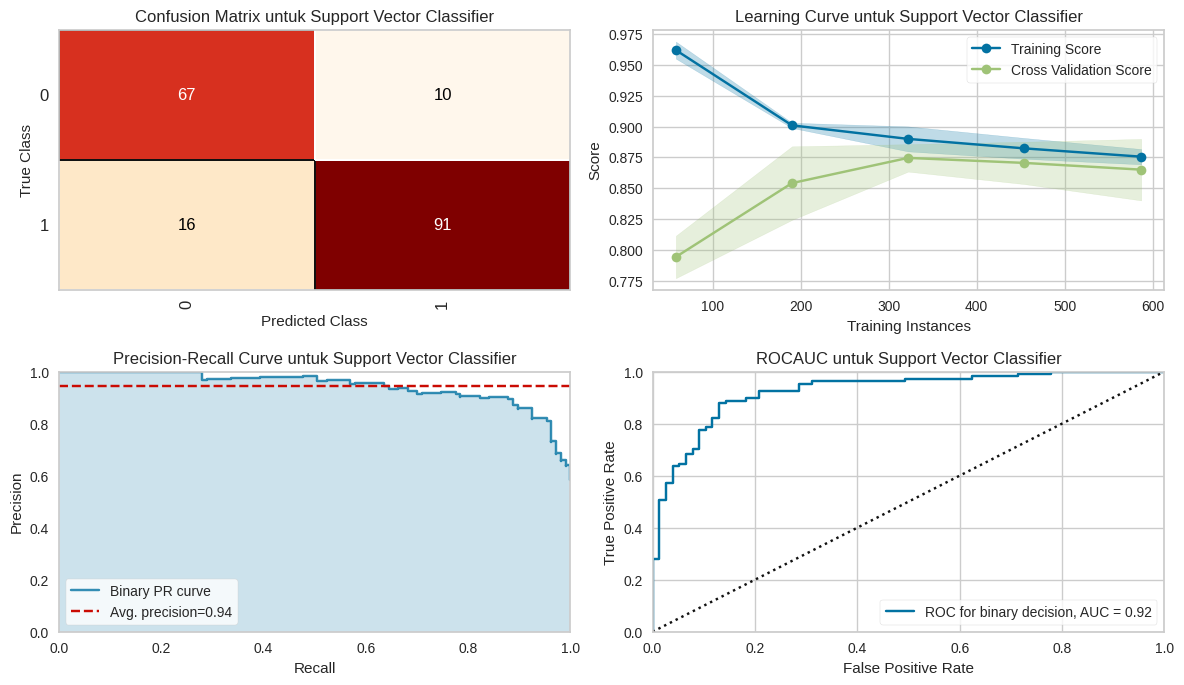

In [21]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
sv_cm = ConfusionMatrix(sv_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk Support Vector Classifier')
sv_cm.fit(x_train, y_train)
sv_cm.score(x_test, y_test)
sv_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
sv_lc = LearningCurve(sv_clf, ax=ax_lc, title='Learning Curve untuk Support Vector Classifier')
sv_lc.fit(x_train, y_train)
sv_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
lr_prc = PrecisionRecallCurve(sv_clf, ax=ax_prc, title='Precision-Recall Curve untuk Support Vector Classifier')
lr_prc.fit(x_train, y_train)
lr_prc.score(x_test, y_test)
lr_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
sv_rocauc = ROCAUC(sv_clf, ax=ax_rocauc, binary=True, title='ROCAUC untuk Support Vector Classifier')
sv_rocauc.fit(x_train, y_train)
sv_rocauc.score(x_test, y_test)
sv_rocauc.finalize()

plt.tight_layout()
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.3 | Decision Tree Classifier </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <i>Decision Tree</i> merupakan struktur pohon yang terdiri dari <i>node-node</i> yang merepresentasikan keputusan dan cabang-cabang yang merepresentasikan konsekuensi dari keputusan tersebut. Setiap <i>node</i> dalam <i>decision tree</i> merepesentasikan variabel dalam dataset yang mempengaruhi keputusan dan konsekuensi tersebut. <i>Decision tree</i> sering digunakan untuk memecah data menjadi subset-subset yang semakin kecil dan homogen hingga didapatkan suatu hasil atau keputusan.
</div>
<center>
    <img src="https://365datascience.com/resources/blog/rr6cuudl59r-decision-trees-image1.png" alt="decision tree" width="50%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo from 365datascience.com</i></span>
</center>

In [22]:
# -- Model Fit --
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_clf.fit(x_train, y_train)

y_pred_dt = dt_clf.predict(x_test)

In [23]:
# -- Skor Akurasi --
dt_acc = accuracy_score(y_pred_dt, y_test)
print('Akurasi Model Decision Tree Classifier: '+'{:.2f}'.format(dt_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_dt))

Akurasi Model Decision Tree Classifier: 86.41

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



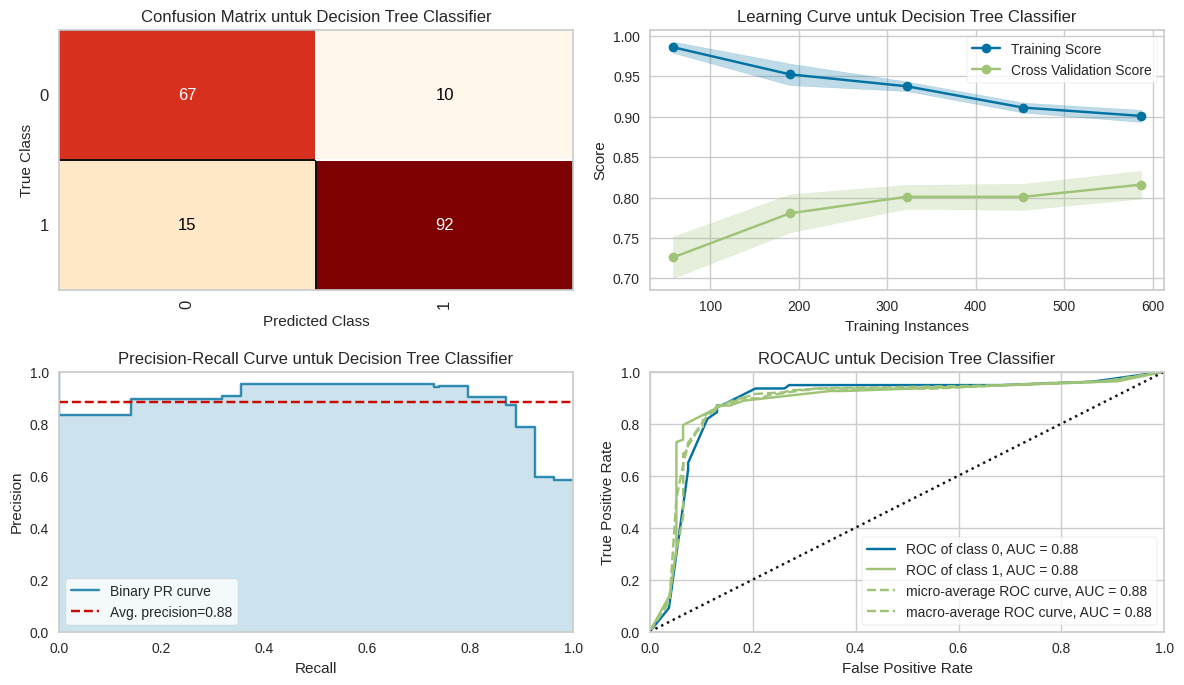

In [24]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
dt_cm = ConfusionMatrix(dt_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk Decision Tree Classifier')
dt_cm.fit(x_train, y_train)
dt_cm.score(x_test, y_test)
dt_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
dt_lc = LearningCurve(dt_clf, ax=ax_lc, title='Learning Curve untuk Decision Tree Classifier')
dt_lc.fit(x_train, y_train)
dt_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
dt_prc = PrecisionRecallCurve(dt_clf, ax=ax_prc, title='Precision-Recall Curve untuk Decision Tree Classifier')
dt_prc.fit(x_train, y_train)
dt_prc.score(x_test, y_test)
dt_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
dt_rocauc = ROCAUC(dt_clf, ax=ax_rocauc, title='ROCAUC untuk Decision Tree Classifier')
dt_rocauc.fit(x_train, y_train)
dt_rocauc.score(x_test, y_test)
dt_rocauc.finalize()

plt.tight_layout()
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.4 | AdaBoost Classifier </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    AdaBoost, singkatan dari Adaptive Boosting, adalah sebuah teknik Boosting yang digunakan sebagai metode ensemble dalam <i>machine learning</i>. Algoritma AdaBoost bekerja dengan cara secara iteratif melatih <i>weak learners</i>, seperti decision tree atau model linear, pada sebuah dataset dan memberikan bobot pada setiap <i>instance training</i> berdasarkan kesalahan klasifikasinya. AdaBoost terbukti memiliki akurasi yang tinggi dan relatif mudah untuk diimplementasikan.
</div>
<center>
    <img src="https://miro.medium.com/max/850/0*KYszvMnr3nCtjaGy.png" alt="decision tree" width="50%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo from towardsdatascience.com</i></span>
</center>

In [25]:
# -- Model Fit --
ab_clf = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0)
ab_clf.fit(x_train, y_train)

y_pred_ab = ab_clf.predict(x_test)

In [26]:
# -- Skor Akurasi --
ab_acc = accuracy_score(y_pred_ab, y_test)
print('Akurasi Model AdaBoost Classifier: '+'{:.2f}'.format(ab_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_ab))

Akurasi Model AdaBoost Classifier: 86.96

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



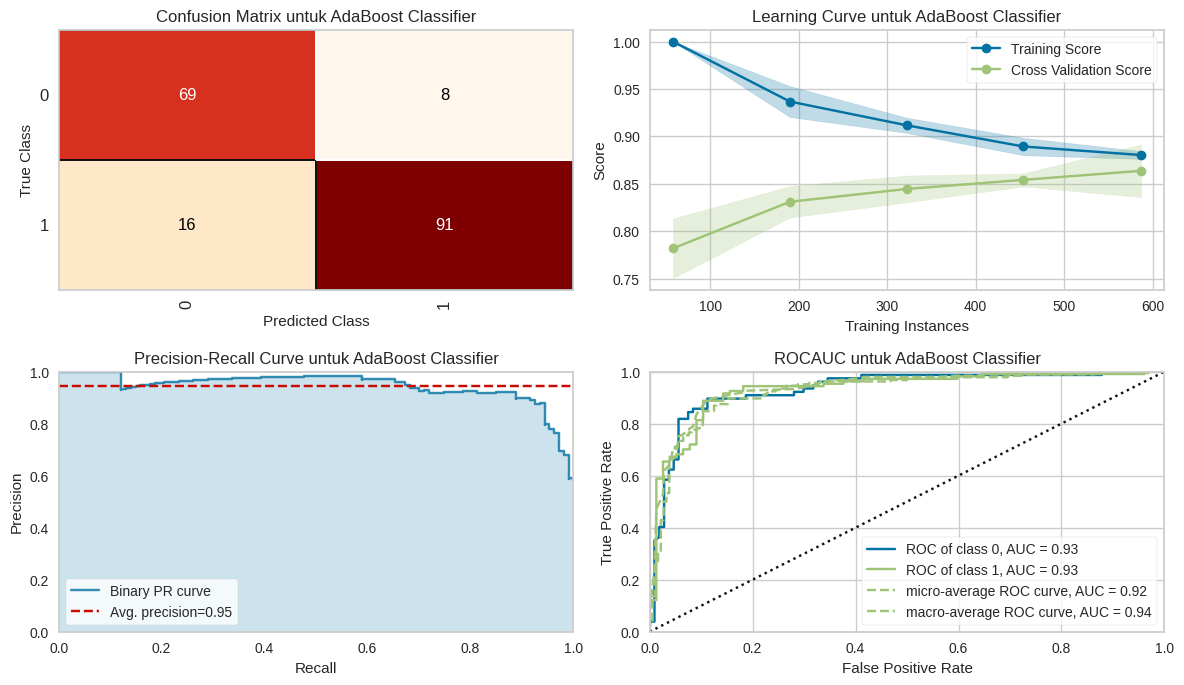

In [27]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
ab_cm = ConfusionMatrix(ab_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk AdaBoost Classifier')
ab_cm.fit(x_train, y_train)
ab_cm.score(x_test, y_test)
ab_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
ab_lc = LearningCurve(ab_clf, ax=ax_lc, title='Learning Curve untuk AdaBoost Classifier')
ab_lc.fit(x_train, y_train)
ab_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
ab_prc = PrecisionRecallCurve(ab_clf, ax=ax_prc, title='Precision-Recall Curve untuk AdaBoost Classifier')
ab_prc.fit(x_train, y_train)
ab_prc.score(x_test, y_test)
ab_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
ab_rocauc = ROCAUC(ab_clf, ax=ax_rocauc, title='ROCAUC untuk AdaBoost Classifier')
ab_rocauc.fit(x_train, y_train)
ab_rocauc.score(x_test, y_test)
ab_rocauc.finalize()

plt.tight_layout()
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.5 | K-Nearest Neighbors Classifier </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    K-Nearest Neighbor adalah algoritma <i>machine learning</i> yang bekerja dengan mengambil sejumlah K data terdekat sebagai acuan untuk menentukan kelas dari data baru. Algoritma ini mengklasifikasikan data berdasarkan kemiripan atau kedekatannya terhadap data lainnya.
</div>
<center>
    <img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" alt="decision tree" width="50%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo from helloacm.com</i></span>
</center>

In [28]:
# -- Model Fit --
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)

y_pred_knn = knn_clf.predict(x_test)

In [29]:
# -- Skor Akurasi --
knn_acc = accuracy_score(y_pred_knn, y_test)
print('Model Akurasi K-Nearest Neighbors Classifier: '+'{:.2f}'.format(knn_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_knn))

Model Akurasi K-Nearest Neighbors Classifier: 82.61

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



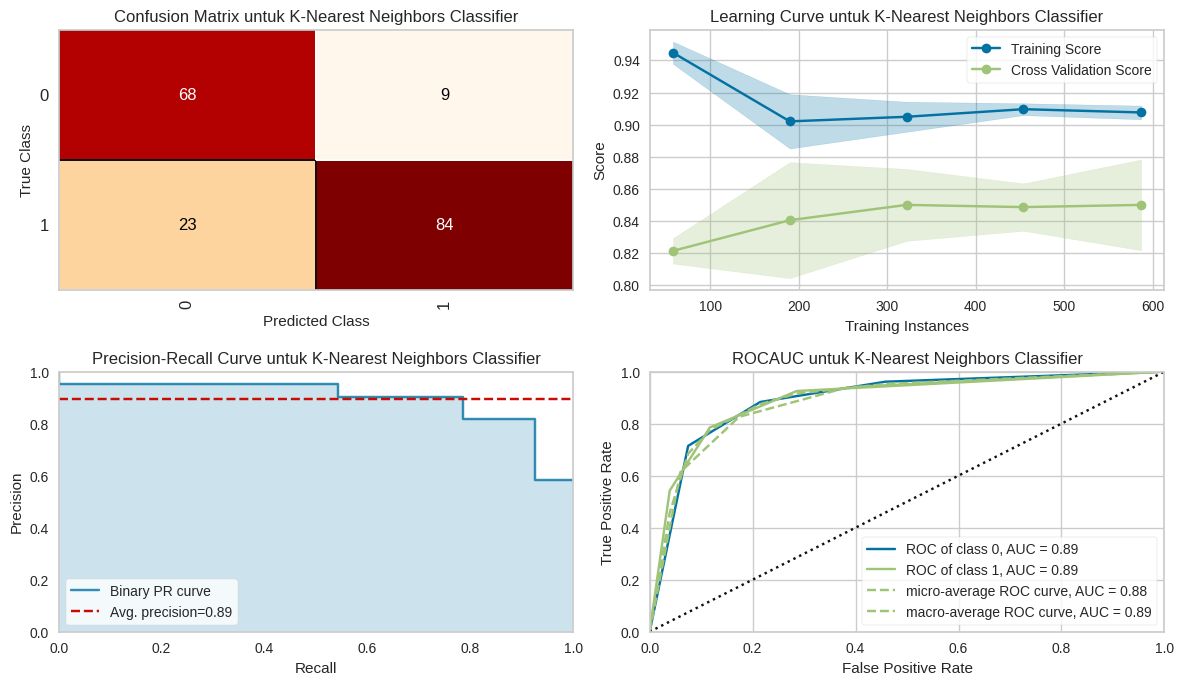

In [30]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
knn_cm = ConfusionMatrix(knn_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk K-Nearest Neighbors Classifier')
knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
knn_lc = LearningCurve(knn_clf, ax=ax_lc, title='Learning Curve untuk K-Nearest Neighbors Classifier')
knn_lc.fit(x_train, y_train)
knn_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
knn_prc = PrecisionRecallCurve(knn_clf, ax=ax_prc, title='Precision-Recall Curve untuk K-Nearest Neighbors Classifier')
knn_prc.fit(x_train, y_train)
knn_prc.score(x_test, y_test)
knn_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
knn_rocauc = ROCAUC(knn_clf, ax=ax_rocauc, title='ROCAUC untuk K-Nearest Neighbors Classifier')
knn_rocauc.fit(x_train, y_train)
knn_rocauc.score(x_test, y_test)
knn_rocauc.finalize()

plt.tight_layout()
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6.6 | Komparasi </div>

In [31]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 'AdaBoost Classifier', 'K-Nearest Neighbors Classifier'],
                       'Akurasi': [lr_acc*100, sv_acc*100, dt_acc*100, ab_acc*100, knn_acc*100]})
compare.sort_values(by='Akurasi', ascending=False).style.background_gradient(cmap='OrRd').hide()

Model,Akurasi
AdaBoost Classifier,86.956522
Decision Tree Classifier,86.413043
Support Vector Classifier,85.869565
Logistic Regression,85.326087
K-Nearest Neighbors Classifier,82.608696


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Model yang memiliki skor akurasi tertinggi adalah AdaBoost Classifier dengan skor akurasi 86,96. Model terbaik akan dilakukan tuning hiperparameter menggunakan GridSearchCV untuk mendapatkan skor yang lebih baik.
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">7 | Model Tuning </div>

In [32]:
n_estimators = [100, 120, 140, 150, 160, 180]
learning_r = [0.1, 1, 0.01, 0.5]
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_r}

cv = StratifiedKFold(n_splits=5)
ab_grid = GridSearchCV(AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0),
                  param_grid=parameters, cv=cv, n_jobs=-1, error_score='raise')

ab_grid.fit(x_train, y_train)
y_pred_ab_grid = ab_grid.predict(x_test)

In [33]:
# -- Skor Akurasi --
ab_grid_acc = accuracy_score(y_pred_ab_grid, y_test)
print('Model Akurasi AdaBoost Classifier dengan GridSearchCV: '+'{:.2f}'.format(ab_grid_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_ab_grid))

Model Akurasi AdaBoost Classifier dengan GridSearchCV: 85.87

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



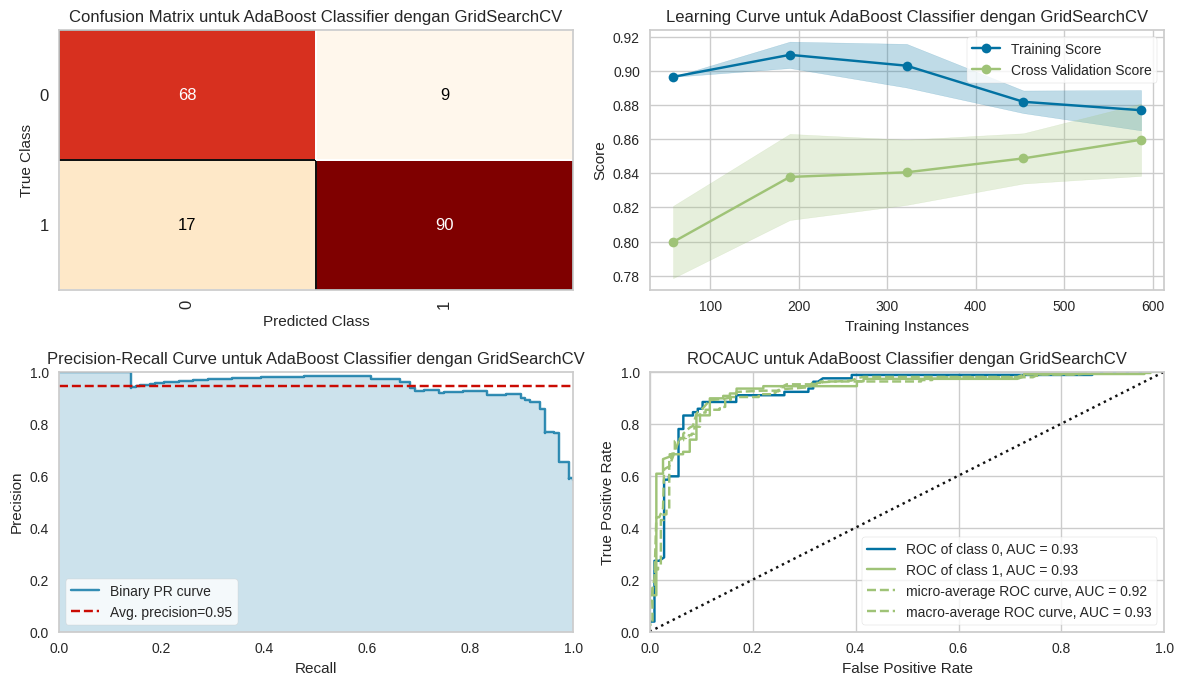

In [34]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
ab_grid_cm = ConfusionMatrix(ab_grid, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_cm.fit(x_train, y_train)
ab_grid_cm.score(x_test, y_test)
ab_grid_cm.finalize()

# -- Learning Curve --
ax_lc = fig.add_subplot(gs[0,1])
ab_grid_lc = LearningCurve(ab_grid, ax=ax_lc, title='Learning Curve untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_lc.fit(x_train, y_train)
ab_grid_lc.finalize()

# -- Precision-Recall Curve --
ax_prc = fig.add_subplot(gs[1,0])
ab_grid_prc = PrecisionRecallCurve(ab_grid, ax=ax_prc, title='Precision-Recall Curve untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_prc.fit(x_train, y_train)
ab_grid_prc.score(x_test, y_test)
ab_grid_prc.finalize()

# -- ROCAUC --
ax_rocauc = fig.add_subplot(gs[1,1])
ab_grid_rocauc = ROCAUC(ab_grid, ax=ax_rocauc, title='ROCAUC untuk AdaBoost Classifier dengan GridSearchCV')
ab_grid_rocauc.fit(x_train, y_train)
ab_grid_rocauc.score(x_test, y_test)
ab_grid_rocauc.finalize()

plt.tight_layout()
plt.show()

In [35]:
hasil = pd.DataFrame({'Model': ['AdaBoost Classifier', 'AdaBoost Classifier dengan GridSearchCV'],
                       'Akurasi': [ab_acc*100, ab_grid_acc*100]})
hasil.sort_values(by='Akurasi', ascending=False).style.background_gradient(cmap='OrRd').hide()

Model,Akurasi
AdaBoost Classifier,86.956522
AdaBoost Classifier dengan GridSearchCV,85.869565


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Setelah dilakukan tuning, model memiliki skor akurasi sebesar 85,87.
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">8 | Prediksi </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Sebagai contoh, saya membuat sebuah data pasien baru (dummy) yang tidak ada di dalam dataset. Data ini akan digunakan untuk memprediksi apakah pasien memiliki penyakit jantung atau tidak. Data pasien adalah sebagai berikut:
    <ul>
        <li>Age (dalam skala)&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;: <b>-0.344</b></li>
        <li>Sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>M (Sex_M)</b></li>
        <li>ChestPainType&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>TA (ChestPainType_TA)</b></li>
        <li>RestingBP (dalam skala)&emsp;&emsp;&emsp;: <b>-0.490</b></li>
        <li>Cholesterol&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>1.038</b></li>
        <li>FastingBS&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&ensp;: <b>1</b></li>
        <li>RestingECG&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;: <b>ST (RestingECG_ST)</b></li>
        <li>MaxHR (dalam skala)&emsp;&emsp;&emsp;&ensp;&ensp;&ensp;&ensp;: <b>1.279</b></li>
        <li>ExerciseAngina&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>Y (ExerciseAngina_Y)</b></li>
        <li>Oldpeak (dalam skala)&emsp;&emsp;&emsp;&ensp;&ensp;&ensp;: <b>0.301</b></li>
        <li>ST_Slope&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&ensp;&ensp;&nbsp;: <b>Up (ST_Slope_Up)</b>
    </ul>
</div>

In [36]:
# -- Men-generate data secara random --
test = [[-0.334, -0.490, 1.038, 1, 1.279,   ## Age, RestingBP, Cholesterol, FastingBS, MaxHR
         0.301, 0, 1, 0, 0,                 ## Oldpeak, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_ATA
         0, 1, 0, 0, 1,                     ## ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST
         0, 1, 0, 0, 1                      ## ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up
        ]]

# -- Prediksi menggunakan AdaBoost Classifier dengan GridSearchCV --
result = ab_grid.predict(test)

if result[0] == 1:
    print('Terdeteksi Penyakit Jantung!')
else:
    print('Tidak Terdeteksi Penyakit Jantung!')

Terdeteksi Penyakit Jantung!


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Dari prediksi yang dilakukan, dapat dilihat bahwa pasien <b>terindikasi memiliki penyakit jantung</b>.
</div>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">9 | Referensi </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Dataset</b>
    <ol>
        <li><a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Heart Failure Prediction Dataset by FEDESORIANO - Kaggle</a></li>
    </ol>
    <b>Artikel Daring</b>
    <ol>
        <li><a href="https://algorit.ma/blog/logistic-regression-adalah-2022/">3 Tipe Logistic Regression yang Wajib Diketahui Data Analyst - Algoritma</a></li>
        <li><a href="https://codingstudio.id/blog/support-vector-machine/">Mengenal Support Vector Machine dan Cara Kerjanya - Coding Studio</a></li>
        <li><a href="https://dqlab.id/apa-itu-decision-tree-di-machine-learning-model">Apa Itu Decision Tree di Machine Learning Model? - DQLab</a></li>
        <li><a href="https://www.trivusi.web.id/2023/07/algoritma-adaboost.html">Algoritma AdaBoost: Pengertian, Cara Kerja, dan Kegunaannya - Trivusi</a></li>
        <li><a href="https://ilmudatapy.com/algoritma-k-nearest-neighbor-knn-untuk-klasifikasi/#:~:text=Seperti%20yang%20telah%20disebutkan%2C%20algoritma%20KNN%20merupakan%20algoritma,similarity%20atau%20kemiripan%20atau%20kedekatannya%20terhadap%20data%20lainnya.">Algoritma K-Nearest Neighbor (KNN) untuk Klasifikasi - IlmudataPy</a></li>
        <li><a href="https://www.alodokter.com/seperti-ini-cara-membaca-hasil-pemeriksaan-tekanan-darah">Inilah Cara Membaca Hasil Pemeriksaan Tekanan Darah yang Benar - Alodokter</a></li>
        <li><a href="https://www.alodokter.com/hal-hal-yang-perlu-anda-ketahui-tentang-tes-kolesterol#:~:text=Tes%20kolesterol%20adalah%20pemeriksaan%20yang%20dilakukan%20untuk%20mengukur,kolesterol%20yang%20tidak%20terkontrol%20dapat%20memicu%20berbagai%20penyakit%2C">Seputar Tes Kolesterol dan Hal-Hal yang Perlu Diketahui - Alodokter</a></li>
        <li><a href="https://www.alodokter.com/arti-tinggi-dan-rendahnya-kadar-gula-darah-dalam-tubuh">Arti Tinggi dan Rendahnya Kadar Gula Darah - Alodokter</a></li>
        <li><a href="https://www.halodoc.com/kesehatan/cek-glukosa-puasa">Cek Glukosa Puasa - Halodoc</a></li>
        <li><a href="https://www.runnerscase.com/2022/03/heart-rate.html">Apa Itu Heart Rate & Bagaimana Cara Menghitung Zona Heart Rate Saat Lari? - Runners Case</a></li>
        <li><a href="https://galihbahtera.medium.com/eksplorasi-data-dan-prediksi-pemodelan-dari-kasus-serangan-jantung-b31b184e5cc">Eksplorasi Data dan Prediksi Pemodelan dari Kasus Serangan Jantung - Medium</a></li>
    </ol>
    <b>Dokumentasi Kode</b>
    <ol>
        <li><a href="https://scikit-learn.org/stable/index.html">scikit-learn: machine learning in Python -- scikit-learn 1.4.1 documentation</a></li>
        <li><a href="https://www.scikit-yb.org/en/latest/index.html">Yellowbrick: Machine Learning Visualization -- Yellowbrick v1.5 documentation</a></li>
    </ol>
</div>

<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 10px;">
        Prediksi Penyakit Jantung menggunakan Algoritma Machine Learning (Version 1) | Released: 18 February 2024 | rafiromolo
    </div>
</center>